# Netflix Stock Price

Author: Huangxiao Zhang

Course Project, UC Irvine, Math 10, F22

## Introduction
 In this predicting project, I am going to make a prediction of Netflix Stock price since I am a big fan of this comany. The data is the price for netflix stock from 2002 to 2021. In the project, I am going to use linear regression and decision tree's Predicted values compare with truth value.


## Importing data

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')

## Sorting Data

### Original Dataset

In [3]:
df

Date        High         Low        Open       Close       Volume  \
0     2002-05-23    1.242857    1.145714    1.156429    1.196429  104790000.0   
1     2002-05-24    1.225000    1.197143    1.214286    1.210000   11104800.0   
2     2002-05-28    1.232143    1.157143    1.213571    1.157143    6609400.0   
3     2002-05-29    1.164286    1.085714    1.164286    1.103571    6757800.0   
4     2002-05-30    1.107857    1.071429    1.107857    1.071429   10154200.0   
...          ...         ...         ...         ...         ...          ...   
4876  2021-10-05  640.390015  606.890015  606.940002  634.809998    9534300.0   
4877  2021-10-06  639.869995  626.359985  628.179993  639.099976    4580400.0   
4878  2021-10-07  646.840027  630.450012  642.229980  631.849976    3556900.0   
4879  2021-10-08  643.799988  630.859985  634.169983  632.659973    3271100.0   
4880  2021-10-11  639.419983  626.780029  633.200012  627.039978    2861200.0   

       Adj Close  
0       1.196429  
1       1.210000  
2       1.157143  
3       1.103571  
4       1.071429  
...          ...  
4876  634.809998  
4877  639.099976  
4878  631.849976  
4879  632.659973  
4880  627.039978  

[4881 rows x 7 columns]

Rename Adj Close to Adjusted Closing Price.([Definition](https://help.yahoo.com/kb/SLN28256.html?guccounter=1) of adjusted closing price)

In [4]:
df = df.rename(columns={'Adj Close' : 'Adjusted Closing Price'}) 

Change type from object to datetime64[ns]

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

Clean null value

In [6]:
df.dropna(inplace=True)

### Clean Dataset

In [7]:
df

Date        High         Low        Open       Close       Volume  \
0    2002-05-23    1.242857    1.145714    1.156429    1.196429  104790000.0   
1    2002-05-24    1.225000    1.197143    1.214286    1.210000   11104800.0   
2    2002-05-28    1.232143    1.157143    1.213571    1.157143    6609400.0   
3    2002-05-29    1.164286    1.085714    1.164286    1.103571    6757800.0   
4    2002-05-30    1.107857    1.071429    1.107857    1.071429   10154200.0   
...         ...         ...         ...         ...         ...          ...   
4876 2021-10-05  640.390015  606.890015  606.940002  634.809998    9534300.0   
4877 2021-10-06  639.869995  626.359985  628.179993  639.099976    4580400.0   
4878 2021-10-07  646.840027  630.450012  642.229980  631.849976    3556900.0   
4879 2021-10-08  643.799988  630.859985  634.169983  632.659973    3271100.0   
4880 2021-10-11  639.419983  626.780029  633.200012  627.039978    2861200.0   

      Adjusted Closing Price  
0                   1.196429  
1                   1.210000  
2                   1.157143  
3                   1.103571  
4                   1.071429  
...                      ...  
4876              634.809998  
4877              639.099976  
4878              631.849976  
4879              632.659973  
4880              627.039978  

[4881 rows x 7 columns]

## Seaborn and Altair Chart

This is the line chart which shows the Adjusted Closing Price increase with time by [sns.lineplot](https://seaborn.pydata.org/examples/errorband_lineplots.html).

[Text(0.5, 1.0, 'Date and Adjusted Closing Price')]

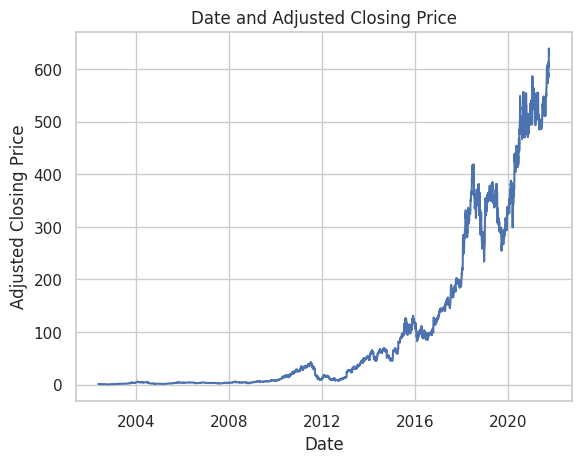

In [18]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Date", y="Adjusted Closing Price", data=df).set(title='Date and Adjusted Closing Price')

This is a bar chart which indicates the changes of volume is cyclical

In [9]:
chart = alt.Chart(df).mark_bar().encode(
    x='Date',
    y='Open',
).properties(
    title='Date and Open Price'
)
chart

alt.Chart(...)

## Build Training and Test Set


Split the dataset into 2 parts: X includes Highest Price, Lowest Price, Openning Price, and Volume; y includes Adjusted Closing Price.

In [10]:
X = df.loc[:, ["High", "Low", "Open", "Volume"]]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Linear Regression

Train the data

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

predicting value for Linear Regression

In [12]:
linear_pred = reg.predict(X_test)

find the mean squared error for Linear Regression

In [13]:
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mse

2.0652666805811815

## Decision Tree Regressor

Train the data

In [14]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

predicting value for DecisionTree

In [15]:
dt_pred = dt.predict(X_test)

find the mean squared error for DecisionTree

In [16]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mse

8.674851664178735

## Result

Comparing Truth value and Predicted value within one chart. [sns.scatterplot](https://seaborn.pydata.org/examples/different_scatter_variables.html)

[Text(0.5, 1.0, 'Truth vs. Pred for Linear and DT')]

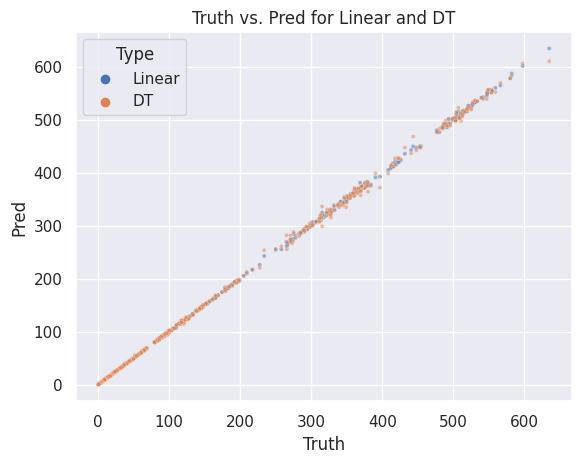

In [17]:
sns.set_theme()
results = pd.DataFrame({
    "Type": ["Linear"]*y_test.shape[0] + ["DT"]*y_test.shape[0], 
    "Truth": y_test.tolist() * 2,
    "Pred": linear_pred.tolist() + dt_pred.tolist()
})

sns.scatterplot(x="Truth", y="Pred", hue="Type", data=results, alpha=0.5, s=9).set(title='Truth vs. Pred for Linear and DT')

## Summary
At the beginning, I plot two images to show the changes of Adjusted Closing Price and volume. The first image is a line chart which shows the Adjusted Closing Price increase with time while the second image is a bar chart which indicates the changes of volume is cyclical. Next I split the dataset into 2 parts, one with 80% random samples as train set and the remaine 20% random samples as test set. I fit a linear regression model and a decision model based on train set and evaluate the performances of them by these sets. The results shows that the mean squared error of the linear model is 2.0652666805811815 while the mean squared error of the decision tree is 8.75387563145938. Finally I plot a scatterplot which the x axis stands for the value of Adjusted Closing Price in the test set and the y axis represents the value of predictions of the two models. The scatterplot shows that both models has a relative wonderful performances.


## References

Your code above should include references.  Here is some additional space for references.
[sns.lineplot](https://seaborn.pydata.org/examples/errorband_lineplots.html)
[sns.scatterplot](https://seaborn.pydata.org/examples/different_scatter_variables.html)


* What is the source of your dataset(s)?
[Kaggle](https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time)

* List any other references that you found helpful.
[seaborn.set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42fe845b-b200-408b-92a9-f532cc933eba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>